In [2]:
# Imports
import numpy as np
import tensorflow as tf
import os
from matplotlib import pyplot as plt
import random
import time

In [2]:
def gen_img(pattern):
    pattern = pattern.reshape(edg, edg)
    p1 = plt.imshow(pattern)
    return p1

In [3]:
edg = 64
cd = os.getcwd()
logpath = cd+"\\logs"
if os.path.isdir(logpath) == False:
    os.mkdir(logpath)
    print("Log Directory created.")
else:
    print("Log Directory existed.")

Log Directory existed.


In [56]:
# Load training and eval data
path = cd + "\\patterns"

N=5000
train_N = 4000
eval_N = 1000

n_per_label = 100
max_label = 10
num = 1000
shape = 0
size = 3

#load patterns and labels
title = "\\patterns_random_label"+"_"+str(N)+"_size_"+str(size)+"_shape_"+str(shape)+"_nonoverlapping"
filename = path + title
data = np.load(filename+".npy")
title = "\\labels_random_label"+"_"+str(N)+"_size_"+str(size)+"_shape_"+str(shape)+"_nonoverlapping"
filename = path + title
labels = np.load(filename+".npy")


train_data = data[:train_N]
train_labels = labels[:train_N]
eval_data = data[train_N:train_N+eval_N]
eval_labels = labels[train_N:train_N+eval_N]

In [5]:
X = tf.placeholder("float", [None, edg*edg])
Y = tf.placeholder("float", [None, max_label])
# Input Layer
input_layer = tf.reshape(X, [-1, 64, 64, 1])

# Convolutional Layer #1
conv1 = tf.layers.conv2d(
    inputs=input_layer,
    filters=32,
    kernel_size=[5, 5],
    padding="same",
    activation=tf.nn.relu)

# Pooling Layer #1
pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

pool1_flat = tf.reshape(pool1, [-1, 16*16*128])
dense = tf.layers.dense(inputs=pool1_flat, units=1024, activation=tf.nn.relu)


dropout = tf.layers.dropout(
        inputs=dense, rate=0.4)
# Logits Layer
logits = tf.layers.dense(inputs=dropout, units=max_label)
predictions = tf.argmax(logits, axis=1)

In [6]:
eta = 0.1
y = tf.argmax(Y, axis=1)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
train_op = tf.train.GradientDescentOptimizer(eta).minimize(cost)
#train_op = tf.train.AdamOptimizer(eta).minimize(cost)

In [38]:
epochs = 300
mseErr = []
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
for n_epoch in range(epochs):
    if n_epoch%15 == 0:
        time_start = time.time()
    sess.run(train_op, feed_dict={X: train_data, Y: train_labels})
    Err = 1 - (np.mean(np.argmax(train_labels, axis=1)==sess.run(predictions, feed_dict ={X:train_data})))
    mseErr.append(Err)
    if n_epoch%15 == 14:
        time_end = time.time()
        print('Epoch: %d, mean error = %f, used time = %d s'%(n_epoch, Err, time_end - time_start))

Epoch: 4, mean error = 0.088750, used time = 124 s
Epoch: 9, mean error = 0.081750, used time = 121 s
Epoch: 14, mean error = 0.102750, used time = 114 s
Epoch: 19, mean error = 0.155250, used time = 113 s
Epoch: 24, mean error = 0.072250, used time = 125 s
Epoch: 29, mean error = 0.043500, used time = 114 s
Epoch: 34, mean error = 0.037000, used time = 113 s
Epoch: 39, mean error = 0.031750, used time = 126 s
Epoch: 44, mean error = 0.028750, used time = 120 s
Epoch: 49, mean error = 0.026250, used time = 123 s
Epoch: 54, mean error = 0.023250, used time = 117 s
Epoch: 59, mean error = 0.021250, used time = 117 s
Epoch: 64, mean error = 0.018750, used time = 114 s
Epoch: 69, mean error = 0.017750, used time = 111 s
Epoch: 74, mean error = 0.015500, used time = 123 s
Epoch: 79, mean error = 0.013500, used time = 125 s
Epoch: 84, mean error = 0.011750, used time = 106 s
Epoch: 89, mean error = 0.010000, used time = 111 s
Epoch: 94, mean error = 0.008000, used time = 116 s
Epoch: 99, mea

In [3]:
f1 = plt.figure()
plt.plot(mseErr)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.grid()
plt.ylim([0,1])
plt.xlim([0, len(mseErr)])
plt.show()

NameError: name 'mseErr' is not defined

In [40]:
#evaluating the training data
seq = random.sample(range(train_N),9)
print(seq)
y = sess.run(predictions, feed_dict={X: [train_data[kk] for kk in seq]})
print(y)
print(np.argmax([train_labels[kk] for kk in seq], axis=1))

[771, 1534, 1742, 1397, 2643, 2750, 2931, 1970, 1343]
[6 8 4 2 4 1 2 8 3]
[6 8 4 2 4 1 2 8 3]


[[6 8 4]
 [2 4 1]
 [2 8 3]]


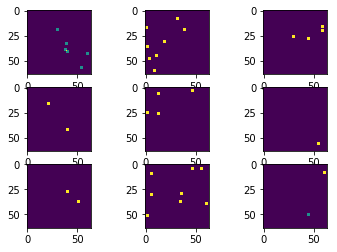

In [41]:
#plot the training data
print(np.argmax(train_labels[seq], axis=1).reshape(3,3))
f2 = plt.figure()
for ii in range(9):
    plt.subplot(3,3, ii+1)
    gen_img(train_data[seq[ii]])
plt.show(f2)

In [42]:
#evaluating the testing data
seq = random.sample(range(eval_N),9)
y = sess.run(predictions, feed_dict={X: [eval_data[kk] for kk in seq]})
print(y)
print(np.argmax([eval_labels[kk] for kk in seq], axis=1))

[4 7 2 4 0 4 0 5 5]
[5 4 1 3 0 4 0 5 4]


[[5 4 1]
 [3 0 4]
 [0 5 4]]


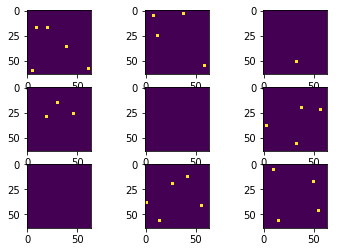

In [43]:
#plot the testing data
print(np.argmax(eval_labels[seq], axis=1).reshape(3,3))
f3 = plt.figure()
for ii in range(9):
    plt.subplot(3,3, ii+1)
    gen_img(eval_data[seq[ii]])
plt.show(f3)

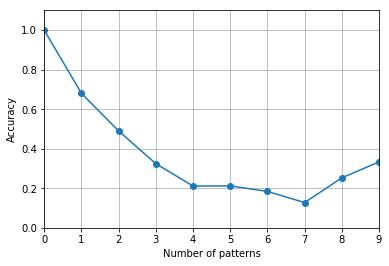

In [49]:
#plot accuracy of each number of patterns of testing data
label_index = np.zeros([max_label])
label_count = np.zeros([max_label])
y = sess.run(predictions, feed_dict={X: eval_data})
y_ = np.argmax(eval_labels, axis =1)
for kk in range(eval_N):
    index = y_[kk]
    label_index[index] = label_index[index] + 1
    if y[kk] == y_[kk]:
        label_count[index] = label_count[index] +1
label_acc = label_count/label_index
label_acc = label_acc.reshape(max_label)
f4 = plt.figure()
plt.plot(label_acc, marker='o')
plt.xlim([0,9])
plt.ylim([0,1.1])
plt.xlabel('Number of patterns')
plt.ylabel('Accuracy')
plt.grid()
plt.show(f4)

In [45]:
title = "\\random_label"+"_"+str(N)+"_size_"+str(size)+"_shape_"+str(shape)+"_nonoverlapping"
filename = path + title

In [55]:
f1.savefig(filename+"_MSE_Epochs.png")
f1.savefig(filename+"_MSE_Epochs.pdf")
f3.savefig(filename+"_PatternSamples.png")
f3.savefig(filename+"_PatternSamples.pdf")
f4.savefig(filename+"_Accuracy_Number.png")
f4.savefig(filename+"_Accuracy_Number.pdf")